In [ ]:
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("pd_speech_features.csv")

In [ ]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=27)

In [ ]:
from sklearn.model_selection import train_test_split

y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
df_combined = pd.concat([X_train, y_train], axis=1)

pks = df_combined.loc[df_combined['class'] == 1]
non_pks = df_combined.loc[df_combined['class'] == 0]

print(df_combined['class'].value_counts())
print(df.shape)
# y = df.loc[:,'class']
# X = df.drop(['class', 'id'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
# X = pd.concat([X_train, y_train], axis=1)

# parkinson = X.loc[X['class'] == 1]
# not_parkinson = X.loc[X['class'] == 0]

1    421
0    146
Name: class, dtype: int64
(756, 755)


without Resampling

Resampling

In [ ]:
def resampling(df):
  y = df.loc[:,'class']
  X = df.drop(['class', 'id'], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  df_combined = pd.concat([X_train, y_train], axis=1)

  pks = df_combined.loc[df_combined['class'] == 1]
  non_pks = df_combined.loc[df_combined['class'] == 0]
  print(X_train.shape)

  non_pks_resampled = resample(non_pks,
                            replace=True, # sample with replacement
                            n_samples=len(pks), # match number in majority class
                            random_state=42)
  
  resampled = pd.concat([pks, non_pks_resampled])

  y_train_resampled = resampled.loc[:,'class']
  X_train_resampled = resampled.drop(['class'], axis=1)
  min_max_scaler = preprocessing.MinMaxScaler()
  X_train_resampled = min_max_scaler.fit_transform(X_train_resampled)
  X_test = min_max_scaler.transform(X_test)
  resampled['class'].value_counts()
  print(X_train_resampled.shape)

  #apply SVM to check resampled dataset
  model = LogisticRegression(max_iter=300)
  model.fit(X_train_resampled, y_train_resampled)
  prediction = model.predict(X_test)
  print("--------------------------------------------------")
  print("Accuracy:",accuracy_score(y_test, prediction))
  print("Accuracy:", f1_score(y_test, prediction))
  print("--------------------------------------------------")

resampling(df)


(560, 753)
(834, 753)
--------------------------------------------------
Accuracy: 0.8449197860962567
Accuracy: 0.8960573476702509
--------------------------------------------------


Oversampling: SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.metrics import f1_score

def smote(df):
  y = df.loc[:,'class']
  X = df.drop(['class', 'id'], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  print(X_train.shape)
  min_max_scaler = preprocessing.MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  X_test = min_max_scaler.transform(X_test)

  sm = SMOTE(random_state=42)
  X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

  oversampled = np.column_stack((X_train_smote, y_train_smote))
  print(X_train_smote.shape)
  num_ones = np.count_nonzero(oversampled[:, -1] == 1)
  print("number of PD:", num_ones)
  print("number of non-PD:", oversampled.shape[0]-num_ones)

  model = LogisticRegression(max_iter=300)
  model.fit(X_train_smote, y_train_smote)
  prediction = model.predict(X_test)

  print("--------------------------------------------------")
  print("Accuracy:",accuracy_score(y_test, prediction))
  print("Accuracy:", f1_score(y_test, prediction))
  print("--------------------------------------------------")

smote(df)

(567, 753)
(852, 753)
number of PD: 426
number of non-PD: 426
--------------------------------------------------
Accuracy: 0.8359788359788359
Accuracy: 0.8864468864468865
--------------------------------------------------


ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

def adasyn(df):
  y = df.loc[:,'class']
  X = df.drop(['class', 'id'], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  min_max_scaler = preprocessing.MinMaxScaler()
  X_train = min_max_scaler.fit_transform(X_train)
  X_test = min_max_scaler.transform(X_test)

  ada = ADASYN(random_state=42)
  X_train_smote, y_train_smote = ada.fit_resample(X_train, y_train)

  oversampled = np.column_stack((X_train_smote, y_train_smote))
  num_ones = np.count_nonzero(oversampled[:, -1] == 1)
  print("number of PD:", num_ones)
  print("number of non-PD:", oversampled.shape[0]-num_ones)

  model = LogisticRegression(max_iter=300)
  model.fit(X_train_smote, y_train_smote)
  prediction = model.predict(X_test)

  print("--------------------------------------------------")
  print("Accuracy:",accuracy_score(y_test, prediction))
  print("Accuracy:", f1_score(y_test, prediction))
  print("--------------------------------------------------")

smote(df)

(567, 753)
(852, 753)
number of PD: 426
number of non-PD: 426
--------------------------------------------------
Accuracy: 0.8359788359788359
Accuracy: 0.8864468864468865
--------------------------------------------------


Continue with SMOTE

In [ ]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
df_combined = pd.concat([X_train, y_train], axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

oversampled = np.column_stack((X_train_smote, y_train_smote))
num_ones = np.count_nonzero(oversampled[:, -1] == 1)
print("number of PD:", num_ones)
print("number of non-PD:", oversampled.shape[0]-num_ones)

X_train = X_train_smote
y_train = y_train_smote
X = min_max_scaler.transform(X)
X_train.shape


number of PD: 426
number of non-PD: 426


(852, 753)

Confusion matrix plot

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')

In [ ]:
def plot_confusion_matrix(conf_mat):
  fig, ax = plt.subplots()

  # Create a heatmap from the confusion matrix
  im = ax.imshow(conf_mat, cmap='Blues')

  # Add labels to the plot
  ax.set_xticks([0, 1])
  ax.set_yticks([0, 1])
  ax.set_xticklabels(['predicted_0', 'predicted_1'])
  ax.set_yticklabels(['true_0', 'true_1'])

  # Rotate the tick labels and set their alignment
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

  # Loop over data dimensions and create text annotations
  for i in range(conf_mat.shape[0]):
      for j in range(conf_mat.shape[1]):
          text = ax.text(j, i, conf_mat[i, j],
                        ha="center", va="center", color="black")

  # Add a colorbar
  cbar = ax.figure.colorbar(im, ax=ax)
  cbar.ax.set_ylabel('Number of samples', rotation=-90, va="bottom")

  # Show the plot
  plt.show()

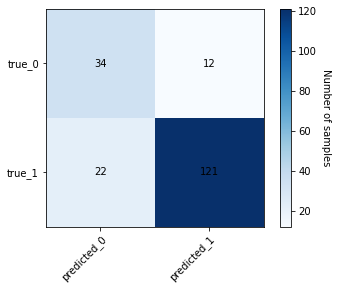

In [ ]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
conf_mat = confusion_matrix(y_test, prediction)
plot_confusion_matrix(conf_mat)

Logistic Regression

--------------------------------------------------------
Test Accuracy LogisticRegression Model : 0.8359788359788359
--------------------------------------------------------
Cross valdation avaerage score 0.8293917741373301
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.73      0.70        51
           1       0.90      0.88      0.89       138

    accuracy                           0.84       189
   macro avg       0.79      0.80      0.80       189
weighted avg       0.84      0.84      0.84       189



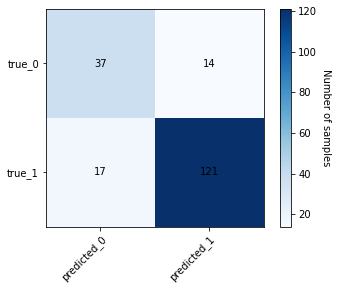

In [ ]:
def lr_func(X_train, y_train, X_test, y_test, X, y):
    model = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
    # fitting the classifier
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("--------------------------------------------------------")
    print("Test Accuracy LogisticRegression Model :",  accuracy_score(y_test, y_pred))
    print("--------------------------------------------------------")
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross valdation avaerage score", score.mean())
    print("--------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx)

lr_func(X_train, y_train, X_test, y_test, X, y)

SVM - linear


--------------------------------------------------------
Test Accuracy LogisticRegression Model : 0.8253968253968254
--------------------------------------------------------
Cross valdation avaerage score 0.808243290345068
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.74      0.67        46
           1       0.91      0.85      0.88       143

    accuracy                           0.83       189
   macro avg       0.76      0.80      0.78       189
weighted avg       0.84      0.83      0.83       189



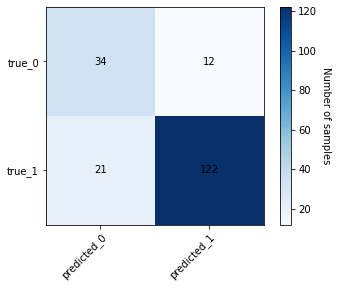

In [ ]:
def svm_func_linear(X_train, y_train, X_test, y_test, X, y): #X and y are needed to calculate cross validation score

    model = SVC(kernel='linear', decision_function_shape='ovr')
    model.fit(X_train, y_train)
    #‘linear’, ‘poly’, ‘rbf’

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("--------------------------------------------------------")
    print("Test Accuracy LogisticRegression Model :",  accuracy_score(y_test, y_pred))
    print("--------------------------------------------------------")
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross valdation avaerage score", score.mean())
    print("--------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx)

svm_func(X_train, y_train, X_test, y_test, X, y)

SVM - poly

--------------------------------------------------------
Test Accuracy LogisticRegression Model : 0.873015873015873
--------------------------------------------------------
Cross valdation avaerage score 0.8399790867898222
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        51
           1       0.91      0.91      0.91       138

    accuracy                           0.87       189
   macro avg       0.84      0.84      0.84       189
weighted avg       0.87      0.87      0.87       189



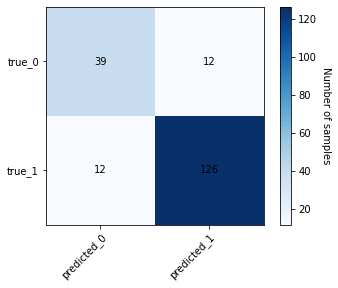

In [ ]:
def svm_func_poly(X_train, y_train, X_test, y_test, X, y): #X and y are needed to calculate cross validation score

    model = SVC(kernel='poly', decision_function_shape='ovr')
    model.fit(X_train, y_train)
    #‘linear’, ‘poly’, ‘rbf’

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("--------------------------------------------------------")
    print("Test Accuracy LogisticRegression Model :",  accuracy_score(y_test, y_pred))
    print("--------------------------------------------------------")
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross valdation avaerage score", score.mean())
    print("--------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx)

svm_func_poly(X_train, y_train, X_test, y_test, X, y)

--------------------------------------------------------
Test Accuracy LogisticRegression Model : 0.7936507936507936
--------------------------------------------------------
Cross valdation avaerage score 0.8439700243987452
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.70      0.62        46
           1       0.89      0.83      0.86       143

    accuracy                           0.79       189
   macro avg       0.73      0.76      0.74       189
weighted avg       0.81      0.79      0.80       189



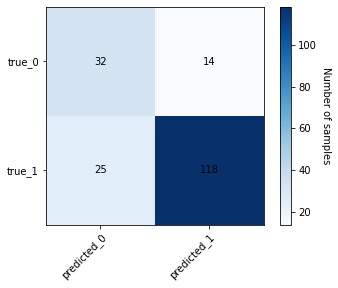

In [ ]:
def svm_rbf(X_train, y_train, X_test, y_test, X, y): #X and y are needed to calculate cross validation score

    model = SVC(kernel='rbf', decision_function_shape='ovr')
    model.fit(X_train, y_train)
    #‘linear’, ‘poly’, ‘rbf’

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("--------------------------------------------------------")
    print("Test Accuracy LogisticRegression Model :",  accuracy_score(y_test, y_pred))
    print("--------------------------------------------------------")
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross valdation avaerage score", score.mean())
    print("--------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx)

svm_rbf(X_train, y_train, X_test, y_test, X, y)

Random Forest classifier



--------------------------------------------------------
Test Accuracy LogisticRegression Model : 0.8042328042328042
--------------------------------------------------------
Cross valdation avaerage score 0.8029801324503312
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        46
           1       0.88      0.86      0.87       143

    accuracy                           0.80       189
   macro avg       0.74      0.75      0.74       189
weighted avg       0.81      0.80      0.81       189



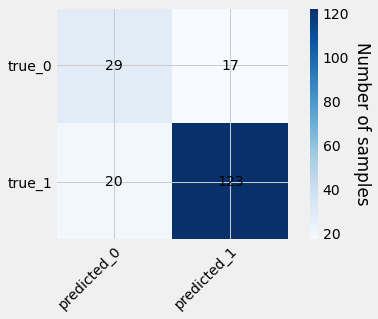

In [ ]:
def RFC(X_train, y_train, X_test, y_test, X, y):
  model = RandomForestClassifier(max_depth=2, random_state=0)
  model.fit(X_train, y_train)
  y_pred = model.predict((X_test))
  print("--------------------------------------------------------")
  print("Test Accuracy LogisticRegression Model :",  accuracy_score(y_test, y_pred))
  print("--------------------------------------------------------")
  score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
  print("Cross valdation avaerage score", score.mean())
  print("--------------------------------------------------------")
  print(classification_report(y_test, y_pred))
  confusion_mtx = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(confusion_mtx)
  
RFC(X_train, y_train, X_test, y_test, X, y)

Naive 

--------------------------------------------------------
Test Accuracy LogisticRegression Model : 0.7354497354497355
--------------------------------------------------------
Cross valdation avaerage score 0.7539212269083304
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.63      0.54        46
           1       0.87      0.77      0.81       143

    accuracy                           0.74       189
   macro avg       0.67      0.70      0.68       189
weighted avg       0.77      0.74      0.75       189



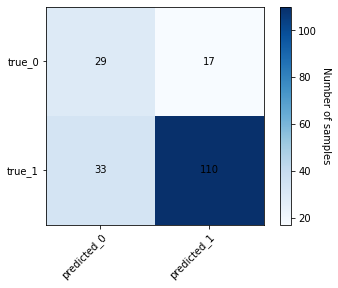

In [ ]:
def GNB(X_train, y_train, X_test, y_test, X, y):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("--------------------------------------------------------")
    print("Test Accuracy LogisticRegression Model :",  accuracy_score(y_test, y_pred))
    print("--------------------------------------------------------")
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross valdation avaerage score", score.mean())
    print("--------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx)

GNB(X_train, y_train, X_test, y_test, X, y)
    

PCA

<Figure size 432x288 with 0 Axes>

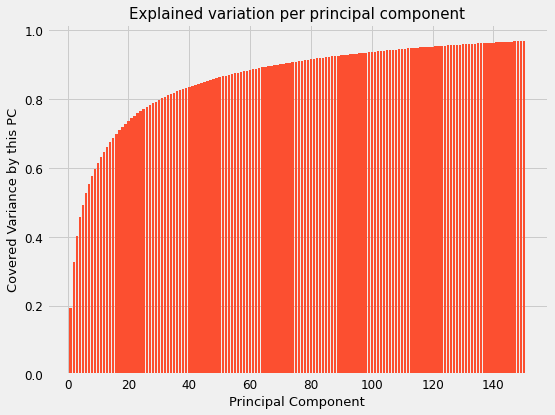

0.953127505633766


In [ ]:
pca = PCA(n_components=150)
X_pca = pca.fit_transform(X)

xs = np.array(range(1,151))
plt.figure()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6));
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.bar(xs, np.cumsum(pca.explained_variance_ratio_));
plt.bar(xs, np.cumsum(pca.explained_variance_ratio_));
plt.xlabel('Principal Component', fontsize=13);
plt.ylabel('Covered Variance by this PC', fontsize=13);
plt.title("Explained variation per principal component", fontsize=15);
plt.show();

pca = PCA(n_components=120)
X_pca = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_)[-1]) #when pcs are 120, 95% variance

upsampling + PCA with 120 + SVM_poly

In [ ]:
pca = PCA(n_components=120, whiten=False, svd_solver='auto')

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

model = SVC(kernel='poly', decision_function_shape='ovr')
model.fit(X_train, y_train)
#‘linear’, ‘poly’, ‘rbf’

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("--------------------------------------------------------")
print("Test Accuracy LogisticRegression Model :",  accuracy_score(y_test, y_pred))
print("--------------------------------------------------------")
score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross valdation avaerage score", score.mean())
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx)



--------------------------------------------------------
Test Accuracy LogisticRegression Model : 0.8201058201058201
--------------------------------------------------------
Cross valdation avaerage score 0.7473597072150575
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.26      0.41        46
           1       0.81      1.00      0.89       143

    accuracy                           0.82       189
   macro avg       0.90      0.63      0.65       189
weighted avg       0.85      0.82      0.78       189



NameError: ignored